<a href="https://colab.research.google.com/github/lakhani-haya/Retail-Forecasting-Project/blob/main/RetailForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import os
from prophet import Prophet
import matplotlib.pyplot as plt

In [7]:
actual = pd.read_csv("retail_sales_dataset.csv")
actual['Date'] = pd.to_datetime(actual['Date'])

In [8]:
actual_grouped = actual.groupby(['Date', 'Product Category'])['Total Amount'].sum().reset_index()
actual_grouped.columns = ['ds', 'Product Category', 'Sales']
actual_grouped['Type'] = 'Actual'

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9k089h7/u985m2hx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9k089h7/hgvtinhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38243', 'data', 'file=/tmp/tmpt9k089h7/u985m2hx.json', 'init=/tmp/tmpt9k089h7/hgvtinhl.json', 'output', 'file=/tmp/tmpt9k089h7/prophet_modelqglcajw1/prophet_model-20250506004653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


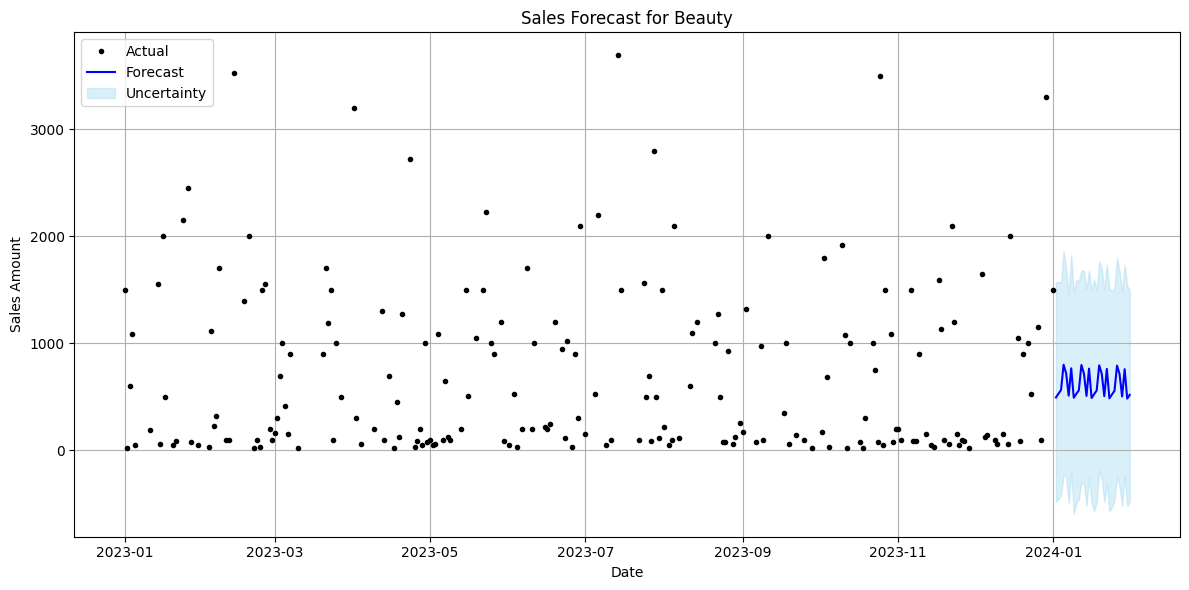

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9k089h7/wcl92bjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9k089h7/i02dywyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35246', 'data', 'file=/tmp/tmpt9k089h7/wcl92bjr.json', 'init=/tmp/tmpt9k089h7/i02dywyf.json', 'output', 'file=/tmp/tmpt9k089h7/prophet_modelovyufy8u/prophet_model-20250506004654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


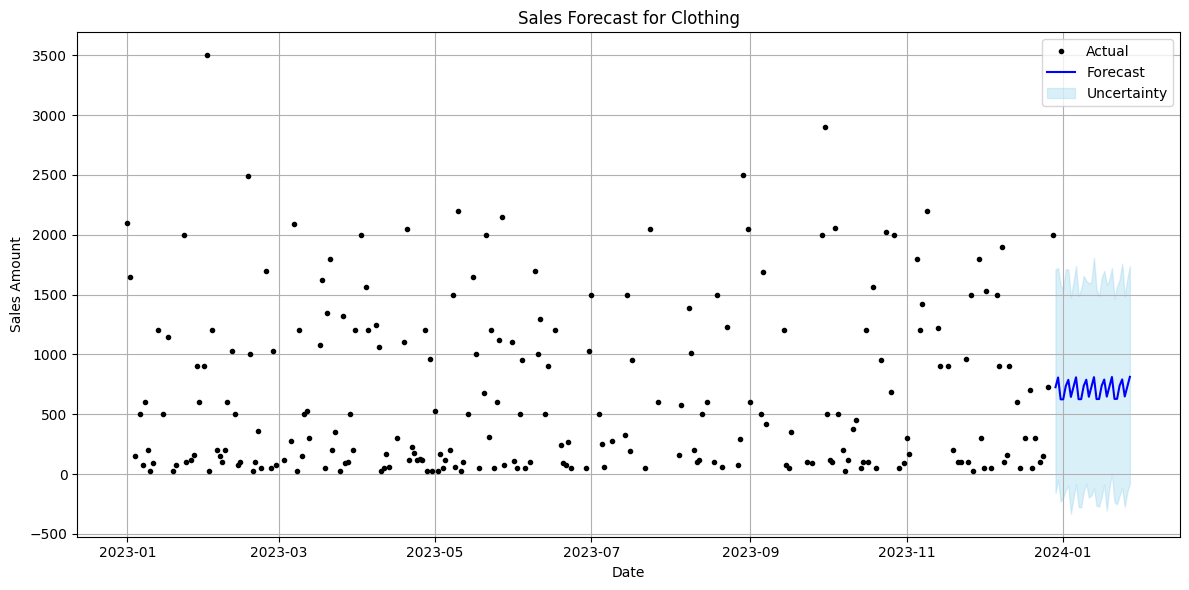

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9k089h7/w0fgjesb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9k089h7/u02jtcgs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10336', 'data', 'file=/tmp/tmpt9k089h7/w0fgjesb.json', 'init=/tmp/tmpt9k089h7/u02jtcgs.json', 'output', 'file=/tmp/tmpt9k089h7/prophet_modelvv09yv_9/prophet_model-20250506004654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


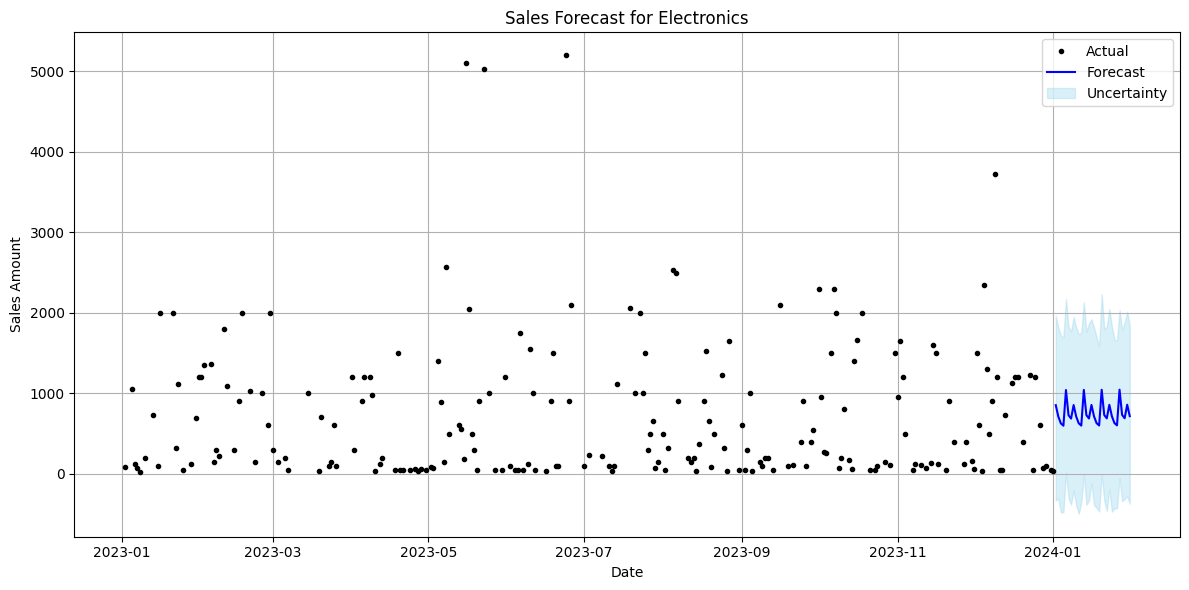

In [9]:
output_dir = "category_forecasts"
os.makedirs(output_dir, exist_ok=True)

forecast_dfs = []

categories = actual['Product Category'].unique()

for cat in categories:
    cat_data = actual_grouped[actual_grouped['Product Category'] == cat][['ds', 'Sales']]


    if len(cat_data) >= 20:
        model = Prophet()
        model.fit(cat_data.rename(columns={'ds': 'ds', 'Sales': 'y'}))

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)


        last_actual_date = cat_data['ds'].max()
        forecast_future = forecast[forecast['ds'] > last_actual_date].copy()


        forecast_future = forecast_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        forecast_future['Product Category'] = cat
        forecast_future['Type'] = 'Forecast'
        forecast_future.rename(columns={'yhat': 'Sales'}, inplace=True)


        forecast_future.to_csv(f"{output_dir}/forecast_{cat}.csv", index=False)
        forecast_dfs.append(forecast_future)


        plt.figure(figsize=(12, 6))
        plt.plot(cat_data['ds'], cat_data['Sales'], 'k.', label='Actual')
        plt.plot(forecast_future['ds'], forecast_future['Sales'], 'b-', label='Forecast')
        plt.fill_between(forecast_future['ds'],
                         forecast_future['yhat_lower'],
                         forecast_future['yhat_upper'],
                         color='skyblue', alpha=0.3, label='Uncertainty')
        plt.title(f"Sales Forecast for {cat}")
        plt.xlabel("Date")
        plt.ylabel("Sales Amount")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [10]:
forecast_combined = pd.concat(forecast_dfs, ignore_index=True)
combined_all = pd.concat([actual_grouped, forecast_combined], ignore_index=True)


In [11]:
combined_all.to_csv("combined_actual_forecast_by_category.csv", index=False)
print("Forecasting complete. File saved as 'combined_actual_forecast_by_category.csv'")

Forecasting complete. File saved as 'combined_actual_forecast_by_category.csv'
